# Import Libraries

In [3]:
# python
import pickle
from functools import partial

# basics
import numpy as np
import pandas as pd
import scipy.stats as stats

# graphing
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# preprocessing
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.dummy import DummyClassifier
# feature selection
from sklearn.feature_selection import chi2, SelectPercentile, SelectKBest

# model selection
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.metrics import (r2_score, mean_squared_error, accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve, precision_recall_curve, make_scorer,
                             confusion_matrix, multilabel_confusion_matrix, ConfusionMatrixDisplay)

# models
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor
import xgboost as xgb
# model explainability
import shap

# enable reload of changed files
%reload_ext autoreload
%autoreload 2

# plot inline
%matplotlib inline

# make it pretty
from rich.console import Console
from rich import inspect
con = Console()
ins = partial(inspect, methods=True)
%reload_ext rich
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, OrdinalEncoder, FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import (precision_recall_curve,PrecisionRecallDisplay)

# Reading Data

In [4]:
DF=pd.read_csv("data/BD.csv");DF.head()

Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.


,clanodo,fecha,fecha_h,festivo,mes,diaSemana,hora,mda,mtr,mda7,...,mda52,mtr52,ypast52,festivo52,ypast3avg,eolica,fotovol,demanda,temperatura,hsc
0,03DEC-230,01/01/2020,01/01/2020 01:00,0,1,3,1,366.98,360.98,412.31,...,546.67,571.09,1,0,0.333333,1893.677,0.0,514.389,12.0,1.9
1,03DEC-230,01/01/2020,01/01/2020 02:00,0,1,3,2,341.85,360.74,369.05,...,524.58,550.46,1,0,0.666667,1816.833,0.0,500.955,12.0,1.9
2,03DEC-230,01/01/2020,01/01/2020 03:00,0,1,3,3,322.58,358.48,382.16,...,519.71,541.77,1,0,0.666667,1724.406,0.0,486.497,12.0,1.9
3,03DEC-230,01/01/2020,01/01/2020 04:00,0,1,3,4,310.62,344.90,342.09,...,520.72,540.93,1,0,0.666667,1625.519,0.0,472.968,12.0,1.9
4,03DEC-230,01/01/2020,01/01/2020 05:00,0,1,3,5,282.84,329.55,253.99,...,519.45,552.57,1,0,0.666667,1502.951,0.0,471.125,12.0,1.9


In [5]:
DF['fecha']=pd.to_datetime(DF['fecha']);DF.head()
DF['fecha_h']=pd.to_datetime(DF['fecha_h']);DF.head()

,clanodo,fecha,fecha_h,festivo,mes,diaSemana,hora,mda,mtr,mda7,...,mda52,mtr52,ypast52,festivo52,ypast3avg,eolica,fotovol,demanda,temperatura,hsc
0,03DEC-230,2020-01-01,2020-01-01 01:00:00,0,1,3,1,366.98,360.98,412.31,...,546.67,571.09,1,0,0.333333,1893.677,0.0,514.389,12.0,1.9
1,03DEC-230,2020-01-01,2020-01-01 02:00:00,0,1,3,2,341.85,360.74,369.05,...,524.58,550.46,1,0,0.666667,1816.833,0.0,500.955,12.0,1.9
2,03DEC-230,2020-01-01,2020-01-01 03:00:00,0,1,3,3,322.58,358.48,382.16,...,519.71,541.77,1,0,0.666667,1724.406,0.0,486.497,12.0,1.9
3,03DEC-230,2020-01-01,2020-01-01 04:00:00,0,1,3,4,310.62,344.90,342.09,...,520.72,540.93,1,0,0.666667,1625.519,0.0,472.968,12.0,1.9
4,03DEC-230,2020-01-01,2020-01-01 05:00:00,0,1,3,5,282.84,329.55,253.99,...,519.45,552.57,1,0,0.666667,1502.951,0.0,471.125,12.0,1.9


# Fixing temperatura

In [39]:
DF['temperatura']= DF['temperatura'].replace("#Â¡REF!", 0)
DF['temperatura'] = DF['temperatura'].astype('float64')

# Creating output

In [40]:
DF['DART (MXN/MWh)']=DF['mtr']-DF['mda']
DF['DARTbin']=DF['mtr']>=DF['mda']
DF['DARTbin']=DF['DARTbin'].map({True:1,False:0});DF.head()

,clanodo,fecha,fecha_h,festivo,mes,diaSemana,hora,mda,mtr,mda7,...,ypast52,festivo52,ypast3avg,eolica,fotovol,demanda,temperatura,hsc,DART (MXN/MWh),DARTbin
0,03DEC-230,2020-01-01,2020-01-01 01:00:00,0,1,3,1,366.98,360.98,412.31,...,1,0,0.333333,1893.677,0.0,514.389,12.0,1.9,-6.00,0
1,03DEC-230,2020-01-01,2020-01-01 02:00:00,0,1,3,2,341.85,360.74,369.05,...,1,0,0.666667,1816.833,0.0,500.955,12.0,1.9,18.89,1
2,03DEC-230,2020-01-01,2020-01-01 03:00:00,0,1,3,3,322.58,358.48,382.16,...,1,0,0.666667,1724.406,0.0,486.497,12.0,1.9,35.90,1
3,03DEC-230,2020-01-01,2020-01-01 04:00:00,0,1,3,4,310.62,344.90,342.09,...,1,0,0.666667,1625.519,0.0,472.968,12.0,1.9,34.28,1
4,03DEC-230,2020-01-01,2020-01-01 05:00:00,0,1,3,5,282.84,329.55,253.99,...,1,0,0.666667,1502.951,0.0,471.125,12.0,1.9,46.71,1


# Creating Data Frame for a node

In [41]:
node='03DEC-230'
DF_node=DF[DF['clanodo']==node];DF_node.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19800 entries, 0 to 19799
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   clanodo         19800 non-null  object        
 1   fecha           19800 non-null  datetime64[ns]
 2   fecha_h         19800 non-null  datetime64[ns]
 3   festivo         19800 non-null  int64         
 4   mes             19800 non-null  int64         
 5   diaSemana       19800 non-null  int64         
 6   hora            19800 non-null  int64         
 7   mda             19800 non-null  float64       
 8   mtr             19608 non-null  float64       
 9   mda7            19796 non-null  float64       
 10  mtr7            19772 non-null  float64       
 11  ypast7          19800 non-null  int64         
 12  festivo7        19800 non-null  int64         
 13  mda14           19796 non-null  float64       
 14  mtr14           19772 non-null  float64       
 15  yp

# Creating Year and Day

In [42]:
DF_node['Year']=pd.DatetimeIndex(DF_node['fecha']).year; DF_node.head()
DF_node['Day']=pd.DatetimeIndex(DF_node['fecha']).day; DF_node.head()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,clanodo,fecha,fecha_h,festivo,mes,diaSemana,hora,mda,mtr,mda7,...,ypast3avg,eolica,fotovol,demanda,temperatura,hsc,DART (MXN/MWh),DARTbin,Year,Day
0,03DEC-230,2020-01-01,2020-01-01 01:00:00,0,1,3,1,366.98,360.98,412.31,...,0.333333,1893.677,0.0,514.389,12.0,1.9,-6.00,0,2020,1
1,03DEC-230,2020-01-01,2020-01-01 02:00:00,0,1,3,2,341.85,360.74,369.05,...,0.666667,1816.833,0.0,500.955,12.0,1.9,18.89,1,2020,1
2,03DEC-230,2020-01-01,2020-01-01 03:00:00,0,1,3,3,322.58,358.48,382.16,...,0.666667,1724.406,0.0,486.497,12.0,1.9,35.90,1,2020,1
3,03DEC-230,2020-01-01,2020-01-01 04:00:00,0,1,3,4,310.62,344.90,342.09,...,0.666667,1625.519,0.0,472.968,12.0,1.9,34.28,1,2020,1
4,03DEC-230,2020-01-01,2020-01-01 05:00:00,0,1,3,5,282.84,329.55,253.99,...,0.666667,1502.951,0.0,471.125,12.0,1.9,46.71,1,2020,1


# Remove Natural Gas Crisis 2021

In [43]:
DF_temp_A = DF_node[DF_node['fecha'] < '2021-02-13']
DF_temp_B = DF_node[DF_node['fecha'] >= '2021-02-22']
DF_node=pd.concat([DF_temp_A,DF_temp_B],axis=0);DF_node

,clanodo,fecha,fecha_h,festivo,mes,diaSemana,hora,mda,mtr,mda7,...,ypast3avg,eolica,fotovol,demanda,temperatura,hsc,DART (MXN/MWh),DARTbin,Year,Day
0,03DEC-230,2020-01-01,2020-01-01 01:00:00,0,1,3,1,366.98,360.98,412.31,...,0.333333,1893.677,0.000,514.389,12.0,1.90,-6.00,0,2020,1
1,03DEC-230,2020-01-01,2020-01-01 02:00:00,0,1,3,2,341.85,360.74,369.05,...,0.666667,1816.833,0.000,500.955,12.0,1.90,18.89,1,2020,1
2,03DEC-230,2020-01-01,2020-01-01 03:00:00,0,1,3,3,322.58,358.48,382.16,...,0.666667,1724.406,0.000,486.497,12.0,1.90,35.90,1,2020,1
3,03DEC-230,2020-01-01,2020-01-01 04:00:00,0,1,3,4,310.62,344.90,342.09,...,0.666667,1625.519,0.000,472.968,12.0,1.90,34.28,1,2020,1
4,03DEC-230,2020-01-01,2020-01-01 05:00:00,0,1,3,5,282.84,329.55,253.99,...,0.666667,1502.951,0.000,471.125,12.0,1.90,46.71,1,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19795,03DEC-230,2022-03-30,2022-03-30 20:00:00,0,3,3,20,1086.16,NaN,1403.61,...,NaN,2535.529,66.651,709.867,20.0,5.01,NaN,0,2022,30
19796,03DEC-230,2022-03-30,2022-03-30 21:00:00,0,3,3,21,2412.35,NaN,1772.35,...,NaN,2164.385,0.000,705.275,18.0,5.01,NaN,0,2022,30
19797,03DEC-230,2022-03-30,2022-03-30 22:00:00,0,3,3,22,1193.01,NaN,1213.71,...,NaN,2069.404,0.000,699.781,14.0,5.01,NaN,0,2022,30
19798,03DEC-230,2022-03-30,2022-03-30 23:00:00,0,3,3,23,1031.34,NaN,1094.56,...,NaN,1958.247,0.000,662.964,12.0,5.01,NaN,0,2022,30


# Remove clanodo and fecha

In [44]:
DF_node_clean = DF_node.drop(['clanodo'], axis=1);
DF_node_clean = DF_node_clean.drop(['fecha'], axis=1);DF_node_clean.head()
DF_node_clean = DF_node_clean.drop(['fecha_h'], axis=1);DF_node_clean.head()

,festivo,mes,diaSemana,hora,mda,mtr,mda7,mtr7,ypast7,festivo7,...,ypast3avg,eolica,fotovol,demanda,temperatura,hsc,DART (MXN/MWh),DARTbin,Year,Day
0,0,1,3,1,366.98,360.98,412.31,379.47,0,0,...,0.333333,1893.677,0.0,514.389,12.0,1.9,-6.00,0,2020,1
1,0,1,3,2,341.85,360.74,369.05,373.72,1,0,...,0.666667,1816.833,0.0,500.955,12.0,1.9,18.89,1,2020,1
2,0,1,3,3,322.58,358.48,382.16,359.53,0,0,...,0.666667,1724.406,0.0,486.497,12.0,1.9,35.90,1,2020,1
3,0,1,3,4,310.62,344.90,342.09,340.69,0,0,...,0.666667,1625.519,0.0,472.968,12.0,1.9,34.28,1,2020,1
4,0,1,3,5,282.84,329.55,253.99,320.81,1,0,...,0.666667,1502.951,0.0,471.125,12.0,1.9,46.71,1,2020,1


# Identifiy NULL Values

In [45]:
DF_node_clean.isna().sum()

festivo             0
mes                 0
diaSemana           0
hora                0
mda                 0
mtr               168
mda7                4
mtr7                4
ypast7              0
festivo7            0
mda14               4
mtr14              28
ypast14             0
festivo14           0
mda52               1
mtr52              25
ypast52             0
festivo52           0
ypast3avg         152
eolica              0
fotovol             0
demanda            24
temperatura       123
hsc                 0
DART (MXN/MWh)    168
DARTbin             0
Year                0
Day                 0
dtype: int64

In [46]:
DF_node_clean=DF_node_clean.dropna();DF_node_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19211 entries, 0 to 19631
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   festivo         19211 non-null  int64  
 1   mes             19211 non-null  int64  
 2   diaSemana       19211 non-null  int64  
 3   hora            19211 non-null  int64  
 4   mda             19211 non-null  float64
 5   mtr             19211 non-null  float64
 6   mda7            19211 non-null  float64
 7   mtr7            19211 non-null  float64
 8   ypast7          19211 non-null  int64  
 9   festivo7        19211 non-null  int64  
 10  mda14           19211 non-null  float64
 11  mtr14           19211 non-null  float64
 12  ypast14         19211 non-null  int64  
 13  festivo14       19211 non-null  int64  
 14  mda52           19211 non-null  float64
 15  mtr52           19211 non-null  float64
 16  ypast52         19211 non-null  int64  
 17  festivo52       19211 non-null 

# Visualizing DART

<Figure size 1152x576 with 1 Axes>

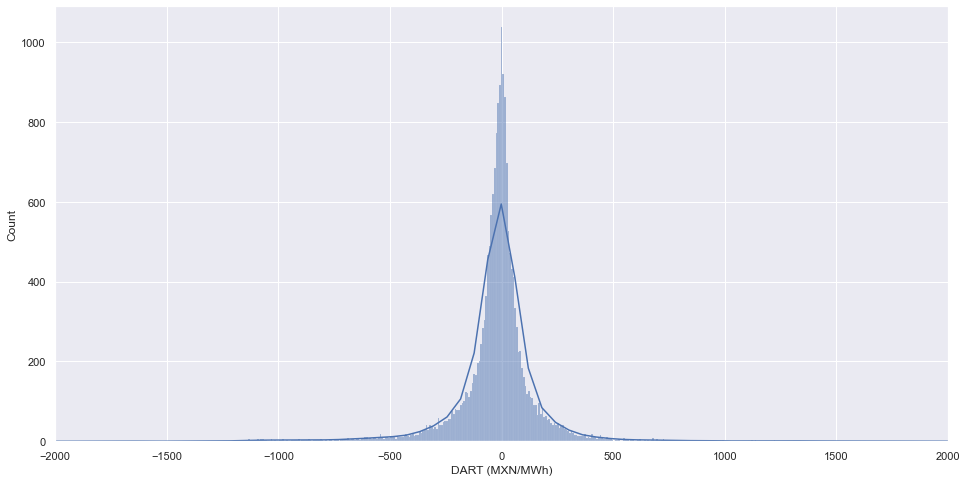

In [48]:
fig, ax = plt.subplots()
sns.set(rc={"figure.figsize":(16, 8)})
sns.histplot(data=DF_node_clean, x='DART (MXN/MWh)', kde=True)
ax.set_xlim(-2000, 2000)
plt.show()

# The data is balanced

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<Figure size 576x288 with 1 Axes>

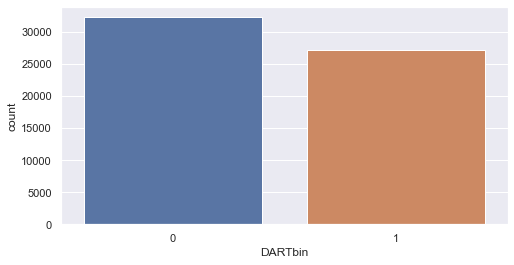

In [49]:
sns.set(rc={"figure.figsize":(8, 4)})
sns.countplot(DF['DARTbin'])
plt.show()

In [50]:
DF_node_clean.describe()

,festivo,mes,diaSemana,hora,mda,mtr,mda7,mtr7,ypast7,festivo7,...,ypast3avg,eolica,fotovol,demanda,temperatura,hsc,DART (MXN/MWh),DARTbin,Year,Day
count,19211.000000,19211.000000,19211.000000,19211.000000,19211.000000,19211.000000,19211.000000,19211.000000,19211.000000,19211.000000,...,19211.000000,19211.000000,19211.000000,19211.000000,19211.000000,19211.000000,19211.000000,19211.000000,19211.000000,19211.000000
mean,0.014991,6.112540,3.977096,12.492218,739.494651,733.984536,752.370739,744.539148,0.448493,0.011244,...,0.452380,2376.995395,1798.234891,570.506816,18.800687,3.151874,-5.510115,0.451304,2020.645568,15.404456
std,0.121521,3.548142,1.993220,6.918239,327.092825,396.658842,394.402340,452.307292,0.497353,0.105441,...,0.339341,907.719441,2104.565461,83.726008,5.945395,6.380773,373.248293,0.497636,0.656671,9.007618
min,0.000000,1.000000,1.000000,1.000000,0.000000,177.240000,0.000000,177.240000,0.000000,0.000000,...,0.000000,255.999000,0.000000,279.931000,-2.000000,1.380000,-6252.850000,0.000000,2020.000000,1.000000
25%,0.000000,3.000000,2.000000,6.000000,535.345000,538.040000,531.610000,534.840000,0.000000,0.000000,...,0.333333,1700.093000,0.000000,515.092500,15.000000,1.900000,-62.575000,0.000000,2020.000000,7.000000
50%,0.000000,6.000000,4.000000,12.000000,676.560000,677.330000,673.750000,675.770000,0.000000,0.000000,...,0.333333,2370.433000,243.669000,571.787000,19.000000,2.685000,-7.290000,0.000000,2021.000000,16.000000
75%,0.000000,9.000000,6.000000,18.000000,868.535000,834.220000,868.365000,832.525000,1.000000,0.000000,...,0.666667,3043.490500,3980.901000,620.918500,23.000000,3.835000,39.735000,1.000000,2021.000000,23.000000
max,1.000000,12.000000,7.000000,24.000000,7125.060000,7234.920000,7125.060000,7234.920000,1.000000,1.000000,...,1.000000,5335.031000,6251.815000,1258.226000,34.000000,180.660000,5824.840000,1.000000,2022.000000,31.000000


# Creating Train and Test Data

In [51]:
X_data_clean = DF_node_clean.drop(['DART (MXN/MWh)'], axis=1)
X_data_clean = X_data_clean.drop(['DARTbin'], axis=1)
X_data_clean = X_data_clean.drop(['mda'], axis=1)
X_data_clean = X_data_clean.drop(['mtr'], axis=1)
X_data_clean = X_data_clean.drop(['mda52'], axis=1)
X_data_clean = X_data_clean.drop(['mtr52'], axis=1)
X_data_clean = X_data_clean.drop(['ypast52'], axis=1)
X_data_clean = X_data_clean.drop(['festivo52'], axis=1)
y_data_clean = DF_node_clean['DARTbin']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_data_clean, y_data_clean, test_size=0.33)

# Dummy Model

In [53]:
dc = DummyClassifier(strategy='uniform').fit(X_train, y_train)
yhat_dc = dc.predict(X_test)
accuracy_score(y_test, yhat_dc), precision_score(y_test, yhat_dc), recall_score(y_test, yhat_dc)

(0.4916403785488959, 0.4509068167604753, 0.49570299071845997)

# Default Models

In [54]:
candidates = [LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, XGBClassifier]
accuracies = np.zeros(len(candidates))
precision = np.zeros(len(candidates))
recall = np.zeros(len(candidates))
for i, Model in enumerate(candidates):
    model = Model().fit(X_train, y_train)
    yhat = model.predict(X_test)
    acc = accuracy_score(y_test, yhat)
    prec = precision_score(y_test, yhat)
    rec = recall_score(y_test, yhat)
    accuracies[i] = acc
    precision[i] = prec
    recall[i] = rec
for i, c in enumerate(candidates):
    print(c.__name__,"acc: ",accuracies[i])
    print(c.__name__,"prec: ",precision[i])
    print(c.__name__,"recc: ",recall[i])

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[09:08:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
LogisticRegression acc:  0.5919558359621451
LogisticRegression prec:  0.5912698412698413
LogisticRegression recc:  0.35854245445170163
DecisionTreeClassifier acc:  0.7048895899053628
DecisionTreeClassifier prec:  0.676530612244898
DecisionTreeClassifier recc:  0.6837401168786524
RandomForestClassifier acc:  0.7995268138801261
RandomForestClassifier prec:  0.8109339407744874
RandomForestClassifier recc:  0.7342729460295634
XGBClassifier acc:  0.7656151419558359
XGBClassifier prec:  0.7696097006441834
XGBClassifier recc:  0.698178068064627


<Figure size 576x288 with 1 Axes>

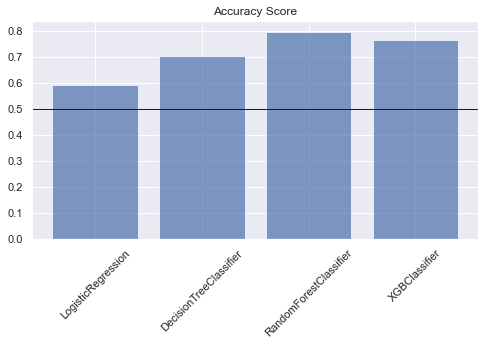

In [55]:
plt.bar([c.__name__ for c in candidates], accuracies, alpha=0.7)
plt.xticks(rotation=45)
plt.axhline(y=0.5001, linewidth=1, color='k')
plt.title("Accuracy Score");

Text(0.5, 1.0, 'Precision Score')

<Figure size 576x288 with 1 Axes>

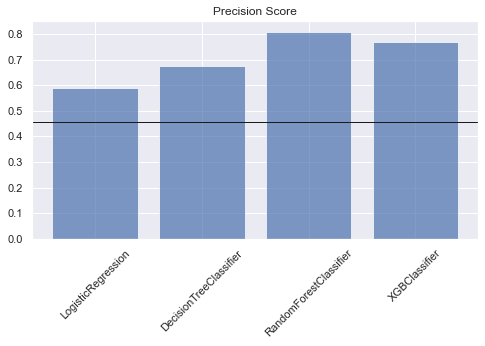

In [56]:
plt.bar([c.__name__ for c in candidates], precision,  alpha=0.7)
plt.xticks(rotation=45)
plt.axhline(y=0.4556, linewidth=1, color='k')
plt.title("Precision Score")

Text(0.5, 1.0, 'Recall Score')

<Figure size 576x288 with 1 Axes>

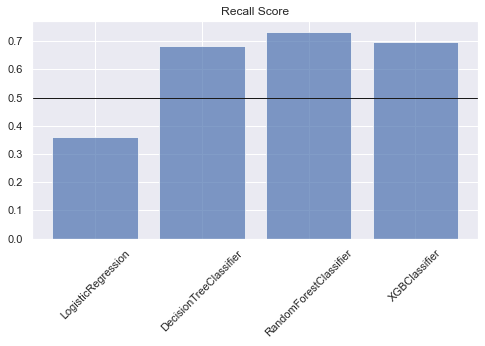

In [57]:
plt.bar([c.__name__ for c in candidates], recall, alpha=0.7)
plt.xticks(rotation=45)
plt.axhline(y=0.4972, linewidth=1, color='k')
plt.title("Recall Score")

# GridSearch XGBoost

In [59]:
parameters = {
    'max_depth': range (2, 32, 4),
    'n_estimators': [5,15,50],
    'learning_rate': [0.3, 0.01]
}
model = XGBClassifier(use_label_encoder =False)
gs = GridSearchCV(model, parameters, cv=5, n_jobs=-1, verbose=1, scoring = 'f1')
gs.fit(X_train, y_train)
gs.best_score_, gs.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[09:15:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


(0.7511002132742659, {'learning_rate': 0.3, 'max_depth': 30, 'n_estimators': 50})

# Final XGBoost Model

In [60]:
finalmodel = XGBClassifier(learning_rate = 0.3, max_depth = 30 , n_estimators = 50)
finalmodel.fit(X_train, y_train)
y_hat = finalmodel.predict(X_test)
f1_score(y_test, y_hat)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[09:18:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7709000355745287

In [61]:
precision_score(y_test, y_hat),recall_score(y_test, y_hat), f1_score(y_test, y_hat)

(0.7987467747880576, 0.7449295290477828, 0.7709000355745287)

Precision: Appropriate when minimizing false positives is the focus.

Recall: Appropriate when minimizing false negatives is the focus.

If MTR > MDA, then 1, else: 0

Large position (sobrenominar): No problem because we have electric coverage en MDA.

Short position (subnominar): We have problem, because we buy the energy at MTR Price and we do not have coverage in that market.

So, we need to minimize the errors when the forecast indicate that MTR will be less than the MDA. In others words, we need to avoid False Negative.

# Confusion matrixPrecision 

<Figure size 576x288 with 2 Axes>

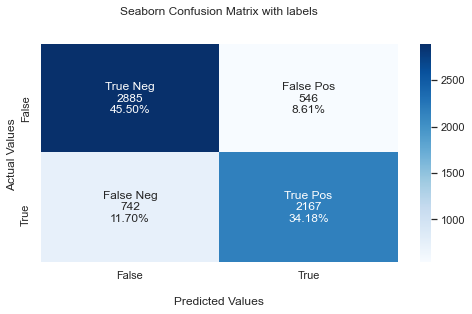

In [62]:
#plot_confusion_matrix(finalmodel,X_test,y_test)
cf_matrix = confusion_matrix(y_test, y_hat)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Thresold anaylisis

In [63]:
y_proba = finalmodel.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:,1])
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
best_thresh = best_thresh
best_thresh

0.41286877

<Figure size 576x288 with 1 Axes>

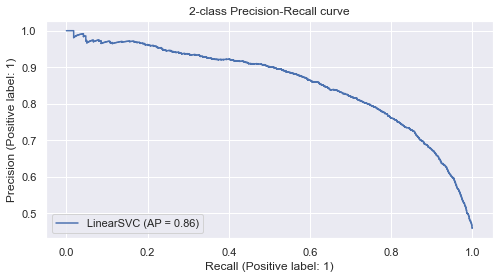

In [64]:
display = PrecisionRecallDisplay.from_estimator(
    finalmodel, X_test, y_test, name="LinearSVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [66]:
y_pred_adj = (finalmodel.predict_proba(X_test)[:,1] >= 0.25).astype(bool) 
precision_score(y_test,y_pred_adj),accuracy_score(y_test,y_pred_adj),recall_score(y_test,y_pred_adj)

(0.7246798603026775, 0.7847003154574133, 0.8559642488827776)

# ROC Curve (mi lap no puede instalar esto)

In [289]:
#import sys
#sys.path.insert(0, '../src')
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from src.roc_curve import roc_curve
from roc_curve import roc_curve

#X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           #n_clusters_per_class=2, n_samples=1000)
#X_train, X_test, y_train, y_test = train_test_split(X, y)

#model = LogisticRegression()
#model.fit(X_train, y_train)
#probabilities = model.predict_proba(X_test)[:, 1]
probabilities = finalmodel.predict_proba(X_test)[:,1]
              
tpr, fpr, thresholds = roc_curve(probabilities, y_test)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity, Recall)")
plt.title("ROC plot of fake data")
plt.show()

╭──────────────────────────── Traceback (most recent call last) ────────────────────────────╮
│ <ipython-input-289-c092dd8f2485>:7 in <module>                                            │
╰───────────────────────────────────────────────────────────────────────────────────────────╯
ModuleNotFoundError: No module named 'src'

# Feature Importance

Gain is the improvement in accuracy brought by a feature to the branches it is on.

Cover measures the relative quantity of observations concerned by a feature.

Frequency is a simpler way to measure the Gain. It just counts the number of times a feature is used in all generated trees. You should not use it (unless you know why you want to use it).

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

<Figure size 576x288 with 1 Axes>

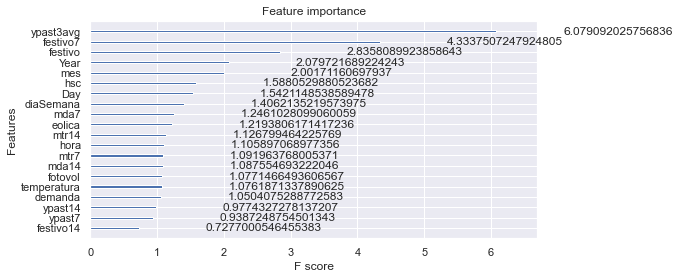

In [67]:
xgb.plot_importance(finalmodel,importance_type='gain')

# Exporting XGBoost final model

In [68]:
import pickle
with open('model.p', 'wb') as f:
    pickle.dump(finalmodel, f, protocol=pickle.HIGHEST_PROTOCOL
)

# ###############################################################################

# Creating data for Random Forest

In [136]:
X_data_clean_rf = DF_node_clean.drop(['DART (MXN/MWh)'], axis=1)
X_data_clean_rf = X_data_clean_rf.drop(['DARTbin'], axis=1)
X_data_clean_rf = X_data_clean_rf.drop(['mda'], axis=1)
X_data_clean_rf = X_data_clean_rf.drop(['mtr'], axis=1)
X_data_clean_rf = X_data_clean_rf.drop(['mda52'], axis=1)
X_data_clean_rf = X_data_clean_rf.drop(['mtr52'], axis=1)
X_data_clean_rf = X_data_clean_rf.drop(['ypast52'], axis=1)
X_data_clean_rf = X_data_clean_rf.drop(['festivo52'], axis=1)
y_data_clean_rf = DF_node_clean['mda']

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X_data_clean_rf, y_data_clean_rf, test_size=0.33)

# Grid Search for Random Forest

In [156]:
#Grid search and final model in a 1 sigle function!
parameters_rf = {'n_estimators': range(20,30),'max_depth': range(9,15)}
def gs_final_model(parameters, model, model_name):

    gs = GridSearchCV(model(), parameters, cv=5, n_jobs=1, verbose=1)
    gs.fit(X_train, y_train)
    m = model(**gs.best_params_).fit(X_train, y_train)
    y_hat = m.predict(X_test)
    r2 = r2_score(y_test, y_hat)

    return model_name, r2, gs.best_params_

In [157]:
#RandomForestRegressor,
rf_2 = gs_final_model(parameters_rf,RandomForestRegressor,'Random Forest')
rf_2 = pd.DataFrame(rf_2)
rf_2 

Fitting 5 folds for each of 60 candidates, totalling 300 fits


,0
0,Random Forest
1,0.786608
2,"{'max_depth': 14, 'n_estimators': 28}"


# #######################################################################

# Creating time series model

We are going to use DF_node

In [73]:
DF_node.head()

,clanodo,fecha,fecha_h,festivo,mes,diaSemana,hora,mda,mtr,mda7,...,ypast3avg,eolica,fotovol,demanda,temperatura,hsc,DART (MXN/MWh),DARTbin,Year,Day
0,03DEC-230,2020-01-01,2020-01-01 01:00:00,0,1,3,1,366.98,360.98,412.31,...,0.333333,1893.677,0.0,514.389,12.0,1.9,-6.00,0,2020,1
1,03DEC-230,2020-01-01,2020-01-01 02:00:00,0,1,3,2,341.85,360.74,369.05,...,0.666667,1816.833,0.0,500.955,12.0,1.9,18.89,1,2020,1
2,03DEC-230,2020-01-01,2020-01-01 03:00:00,0,1,3,3,322.58,358.48,382.16,...,0.666667,1724.406,0.0,486.497,12.0,1.9,35.90,1,2020,1
3,03DEC-230,2020-01-01,2020-01-01 04:00:00,0,1,3,4,310.62,344.90,342.09,...,0.666667,1625.519,0.0,472.968,12.0,1.9,34.28,1,2020,1
4,03DEC-230,2020-01-01,2020-01-01 05:00:00,0,1,3,5,282.84,329.55,253.99,...,0.666667,1502.951,0.0,471.125,12.0,1.9,46.71,1,2020,1


In [74]:
DF_node_ts = DF_node.drop(['clanodo'], axis=1);DF_node_ts.head()

,fecha,fecha_h,festivo,mes,diaSemana,hora,mda,mtr,mda7,mtr7,...,ypast3avg,eolica,fotovol,demanda,temperatura,hsc,DART (MXN/MWh),DARTbin,Year,Day
0,2020-01-01,2020-01-01 01:00:00,0,1,3,1,366.98,360.98,412.31,379.47,...,0.333333,1893.677,0.0,514.389,12.0,1.9,-6.00,0,2020,1
1,2020-01-01,2020-01-01 02:00:00,0,1,3,2,341.85,360.74,369.05,373.72,...,0.666667,1816.833,0.0,500.955,12.0,1.9,18.89,1,2020,1
2,2020-01-01,2020-01-01 03:00:00,0,1,3,3,322.58,358.48,382.16,359.53,...,0.666667,1724.406,0.0,486.497,12.0,1.9,35.90,1,2020,1
3,2020-01-01,2020-01-01 04:00:00,0,1,3,4,310.62,344.90,342.09,340.69,...,0.666667,1625.519,0.0,472.968,12.0,1.9,34.28,1,2020,1
4,2020-01-01,2020-01-01 05:00:00,0,1,3,5,282.84,329.55,253.99,320.81,...,0.666667,1502.951,0.0,471.125,12.0,1.9,46.71,1,2020,1


In [75]:
DF_node_ts.isna().sum()

fecha               0
fecha_h             0
festivo             0
mes                 0
diaSemana           0
hora                0
mda                 0
mtr               168
mda7                4
mtr7                4
ypast7              0
festivo7            0
mda14               4
mtr14              28
ypast14             0
festivo14           0
mda52               1
mtr52              25
ypast52             0
festivo52           0
ypast3avg         152
eolica              0
fotovol             0
demanda            24
temperatura       123
hsc                 0
DART (MXN/MWh)    168
DARTbin             0
Year                0
Day                 0
dtype: int64

In [76]:
DF_node_ts=DF_node_ts.dropna();DF_node_ts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19211 entries, 0 to 19631
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   fecha           19211 non-null  datetime64[ns]
 1   fecha_h         19211 non-null  datetime64[ns]
 2   festivo         19211 non-null  int64         
 3   mes             19211 non-null  int64         
 4   diaSemana       19211 non-null  int64         
 5   hora            19211 non-null  int64         
 6   mda             19211 non-null  float64       
 7   mtr             19211 non-null  float64       
 8   mda7            19211 non-null  float64       
 9   mtr7            19211 non-null  float64       
 10  ypast7          19211 non-null  int64         
 11  festivo7        19211 non-null  int64         
 12  mda14           19211 non-null  float64       
 13  mtr14           19211 non-null  float64       
 14  ypast14         19211 non-null  int64         
 15  fe

In [78]:
DF_node_ts.head()

,fecha,fecha_h,festivo,mes,diaSemana,hora,mda,mtr,mda7,mtr7,...,ypast3avg,eolica,fotovol,demanda,temperatura,hsc,DART (MXN/MWh),DARTbin,Year,Day
0,2020-01-01,2020-01-01 01:00:00,0,1,3,1,366.98,360.98,412.31,379.47,...,0.333333,1893.677,0.0,514.389,12.0,1.9,-6.00,0,2020,1
1,2020-01-01,2020-01-01 02:00:00,0,1,3,2,341.85,360.74,369.05,373.72,...,0.666667,1816.833,0.0,500.955,12.0,1.9,18.89,1,2020,1
2,2020-01-01,2020-01-01 03:00:00,0,1,3,3,322.58,358.48,382.16,359.53,...,0.666667,1724.406,0.0,486.497,12.0,1.9,35.90,1,2020,1
3,2020-01-01,2020-01-01 04:00:00,0,1,3,4,310.62,344.90,342.09,340.69,...,0.666667,1625.519,0.0,472.968,12.0,1.9,34.28,1,2020,1
4,2020-01-01,2020-01-01 05:00:00,0,1,3,5,282.84,329.55,253.99,320.81,...,0.666667,1502.951,0.0,471.125,12.0,1.9,46.71,1,2020,1


In [145]:
#DF_node_ts.index = pd.to_datetime(DF_node_ts['fecha_h'], format='%Y-%m-%d-%h')

# Visualizing PML

[
    <matplotlib.lines.Line2D object at 0x000002318B3C8DF0>,
    <matplotlib.lines.Line2D object at 0x000002318B3C8910>
]

<Figure size 576x288 with 1 Axes>

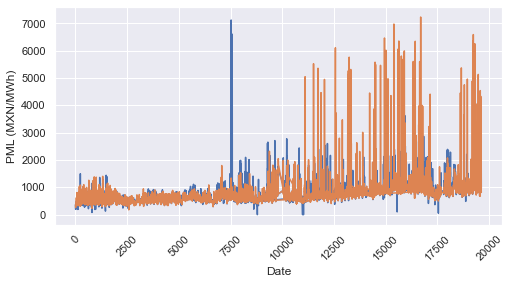

In [79]:
sns.set()
plt.ylabel('PML (MXN/MWh)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(DF_node_ts.index,DF_node_ts['mda'], DF_node_ts['mtr'])

# Splitting data

In [81]:
DF_node_ts_MDA=pd.concat([DF_node_ts['fecha_h'],DF_node_ts['mda']],axis=1);DF_node_ts_MDA.head()
DF_node_ts_MTR=pd.concat([DF_node_ts['fecha_h'],DF_node_ts['mtr']],axis=1);DF_node_ts_MTR.head()

,fecha_h,mtr
0,2020-01-01 01:00:00,360.98
1,2020-01-01 02:00:00,360.74
2,2020-01-01 03:00:00,358.48
3,2020-01-01 04:00:00,344.90
4,2020-01-01 05:00:00,329.55


66% Training and 34% Testing

<Figure size 576x288 with 1 Axes>

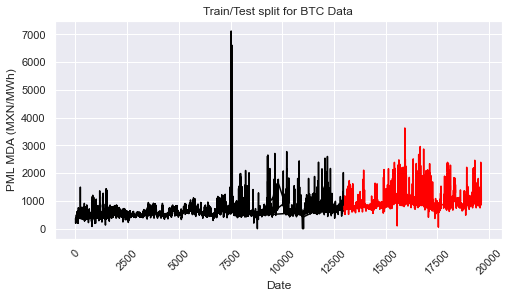

In [82]:
train_mda = DF_node_ts_MDA[DF_node_ts_MDA.index <= 13000]
test_mda = DF_node_ts_MDA[DF_node_ts_MDA.index > 13000]

plt.plot(train_mda['mda'], color = "black")
plt.plot(test_mda['mda'], color = "red")
plt.ylabel('PML MDA (MXN/MWh)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.show()

<Figure size 576x288 with 1 Axes>

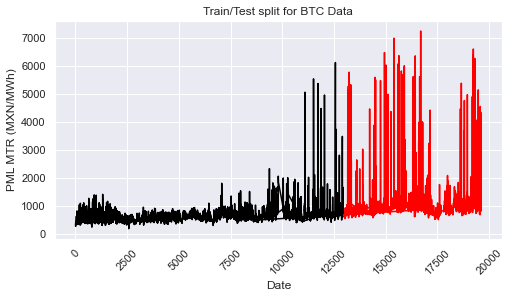

In [83]:
train_mtr = DF_node_ts_MTR[DF_node_ts_MTR.index <= 13000]
test_mtr = DF_node_ts_MTR[DF_node_ts_MTR.index > 13000]

plt.plot(train_mtr['mtr'], color = "black")
plt.plot(test_mtr['mtr'], color = "red")
plt.ylabel('PML MTR (MXN/MWh)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.show()

# Autoregressive Moving Average (ARMA) for MDA

In [112]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [113]:
y = train_mda['mda'];y

0        366.98
1        341.85
2        322.58
3        310.62
4        282.84
          ...  
12996    804.05
12997    948.34
12998    764.53
12999    794.79
13000    769.63
Name: mda, Length: 12725, dtype: float64

In [114]:
ARMAmodel = SARIMAX(y, order = (1, 0, 1))
ARMAmodel = ARMAmodel.fit()

y_pred = ARMAmodel.get_forecast(len(test_mda['mda'].index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test_mda['mda'].index
y_pred_out = y_pred_df["Predictions"] 

An unsupported index was provided and will be ignored when e.g. forecasting.
An unsupported index was provided and will be ignored when e.g. forecasting.
No supported index is available. Prediction results will be given with an integer index beginning at `start`.
No supported index is available. Prediction results will be given with an integer index beginning at `start`.


<Figure size 576x288 with 1 Axes>

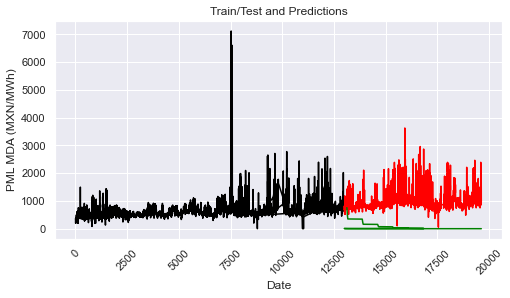

In [115]:
plt.plot(train_mda['mda'], color = "black")
plt.plot(test_mda['mda'], color = "red")
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.ylabel('PML MDA (MXN/MWh)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test and Predictions")
plt.show()

In [116]:
import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test_mda['mda'].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  977.5672957294713


# Autoregressive Integrated Moving Average (ARIMA) for MDA

In [117]:
from statsmodels.tsa.arima.model import ARIMA

In [118]:
ARIMAmodel = ARIMA(y, order = (2, 2, 2))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test_mda['mda'].index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test_mda['mda'].index
y_pred_out = y_pred_df["Predictions"] 

An unsupported index was provided and will be ignored when e.g. forecasting.
An unsupported index was provided and will be ignored when e.g. forecasting.
An unsupported index was provided and will be ignored when e.g. forecasting.
Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
Non-invertible starting MA parameters found. Using zeros as starting parameters.
No supported index is available. Prediction results will be given with an integer index beginning at `start`.
No supported index is available. Prediction results will be given with an integer index beginning at `start`.


<Figure size 576x288 with 1 Axes>

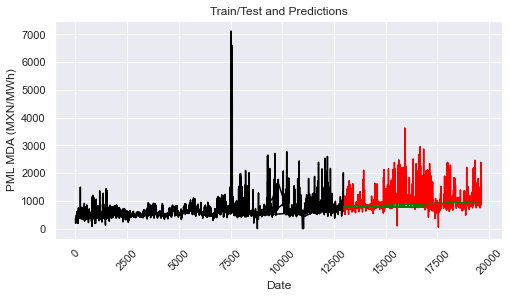

In [119]:
plt.plot(train_mda['mda'], color = "black")
plt.plot(test_mda['mda'], color = "red")
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.ylabel('PML MDA (MXN/MWh)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test and Predictions")
plt.show()

In [120]:
import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test_mda['mda'].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  268.9025686131009


# Seasonal ARIMA (SARIMA) for MDA

In [123]:
SARIMAXmodel = SARIMAX(y, order = (5, 4, 2), seasonal_order=(0, 2, 3, 4))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test_mda['mda'].index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test_mda['mda'].index
y_pred_out = y_pred_df["Predictions"] 

An unsupported index was provided and will be ignored when e.g. forecasting.
An unsupported index was provided and will be ignored when e.g. forecasting.
Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
Non-invertible starting seasonal moving average Using zeros as starting parameters.
Maximum Likelihood optimization failed to converge. Check mle_retvals
No supported index is available. Prediction results will be given with an integer index beginning at `start`.
No supported index is available. Prediction results will be given with an integer index beginning at `start`.


In [ ]:
plt.plot(train_mda['mda'], color = "black")
plt.plot(test_mda['mda'], color = "red")
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.ylabel('PML MDA (MXN/MWh)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test and Predictions")
plt.show()